In [ ]:
!pip install earthpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [ ]:
before_floods_data_path = "/content/drive/MyDrive/Madagascar_18_01_2017"
during_floods_data_path = "/content/drive/MyDrive/Madagascar_27_01_2020"

In [ ]:
before_floods = glob("/content/drive/MyDrive/Madagascar_18_01_2017/*B?*.tiff")
before_floods.sort()
before_floods

['/content/drive/MyDrive/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B01_(Raw).tiff',
 '/content/drive/MyDrive/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B02_(Raw).tiff',
 '/content/drive/MyDrive/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B03_(Raw).tiff',
 '/content/drive/MyDrive/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B04_(Raw).tiff',
 '/content/drive/MyDrive/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B05_(Raw).tiff',
 '/content/drive/MyDrive/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B06_(Raw).tiff',
 '/content/drive/MyDrive/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B07_(Raw).tiff',
 '/content/drive/MyDrive/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B08_(Raw).tiff',
 '/content/drive

In [ ]:
l = []
for i in before_floods:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

arr_bef = np.stack(l)

In [ ]:
arr_bef.shape

(9, 602, 676)

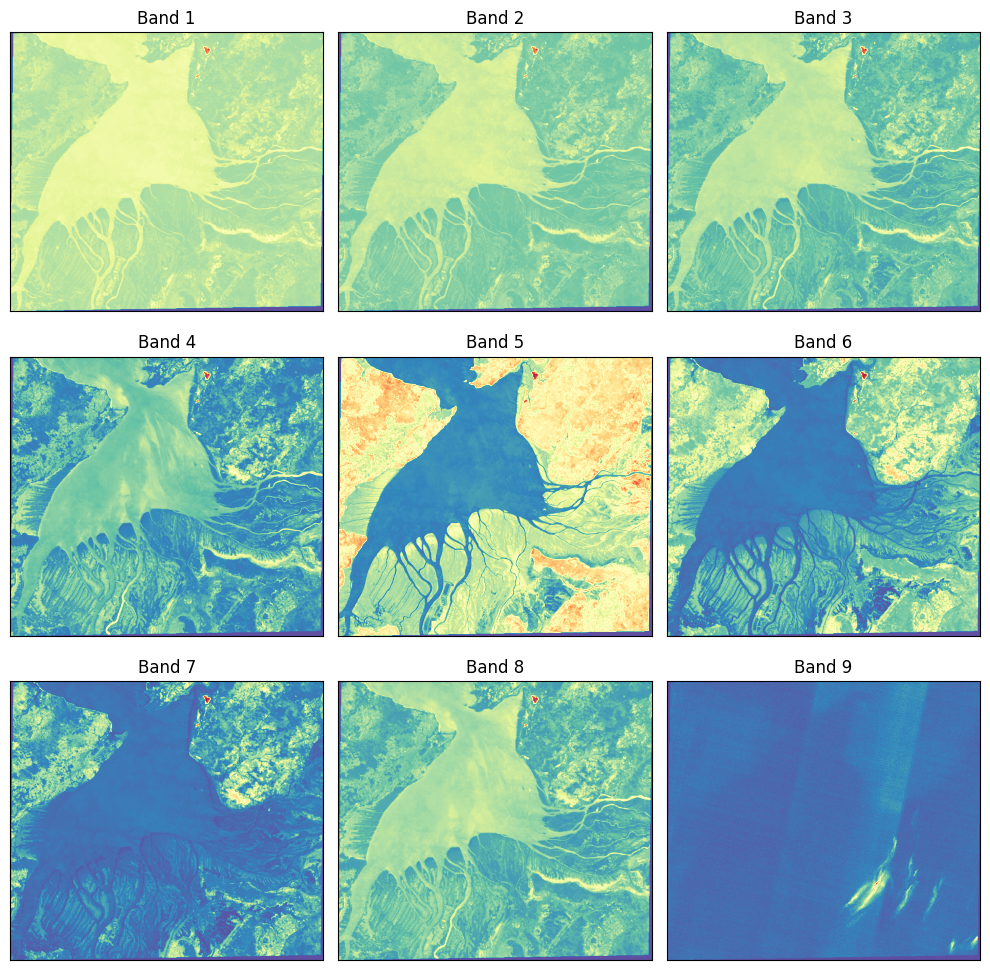

In [ ]:

# Visualize Bands

ep.plot_bands(arr_bef, cmap='Spectral_r', cols=3, figsize=(10, 10), cbar=False)

plt.show()

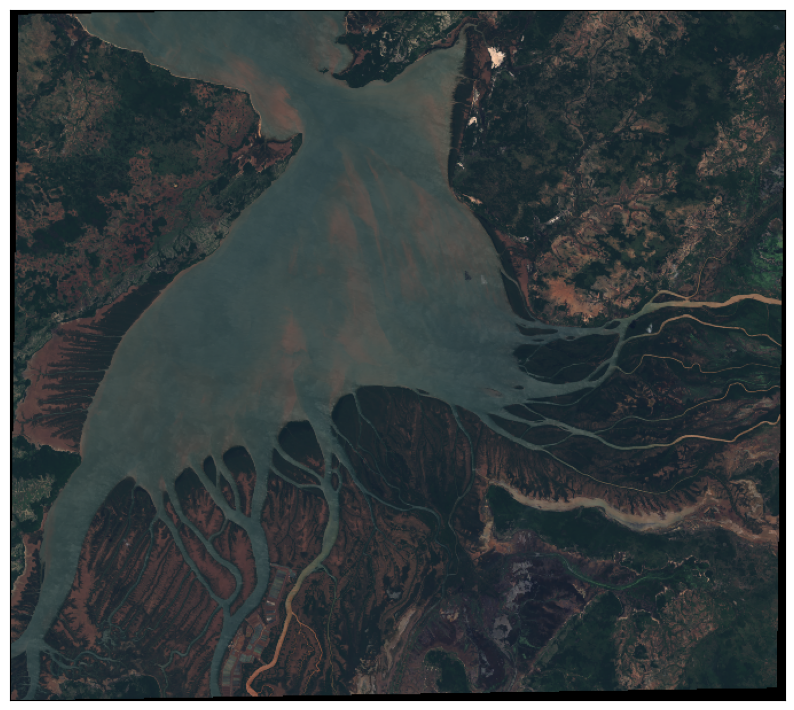

In [ ]:
# Visualize RGB Composite Image

ep.plot_rgb(arr_bef, rgb=(3, 2, 1), figsize=(10, 10))

plt.show()

Normalized Difference Water Index

NDWI = (NIR – SWIR) / (NIR + SWIR)

In [ ]:
# NIR - 5
# SWIR - 6, 7

ndwi_bef = es.normalized_diff(arr_bef[5, :, :], arr_bef[7, :, :])

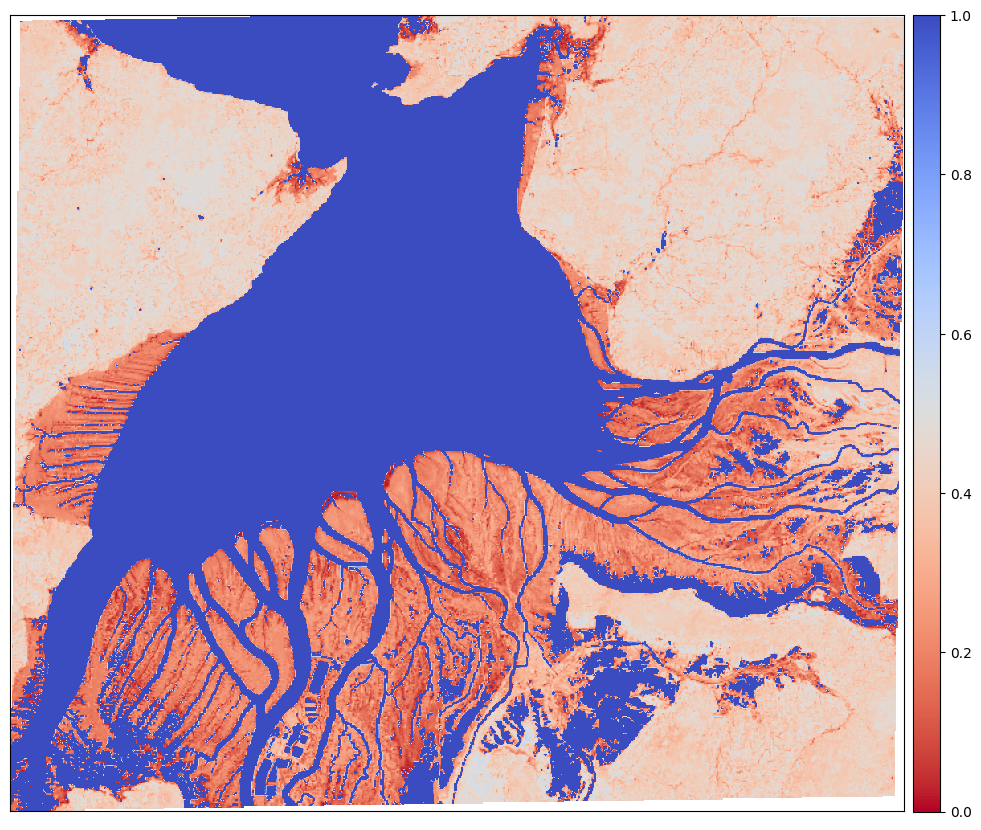

In [ ]:
ep.plot_bands(ndwi_bef, cmap='coolwarm_r', vmin=0, vmax=1)

plt.show()

In [ ]:
during_floods = glob("/content/drive/MyDrive/Madagascar_27_01_2020/*B?*.tiff")
during_floods.sort()
during_floods

['/content/drive/MyDrive/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B01_(Raw).tiff',
 '/content/drive/MyDrive/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B02_(Raw).tiff',
 '/content/drive/MyDrive/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B03_(Raw).tiff',
 '/content/drive/MyDrive/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B04_(Raw).tiff',
 '/content/drive/MyDrive/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B05_(Raw).tiff',
 '/content/drive/MyDrive/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B06_(Raw).tiff',
 '/content/drive/MyDrive/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B07_(Raw).tiff',
 '/content/drive/MyDrive/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B08_(Raw).tiff',
 '/content/drive

In [ ]:
dl = []
for i in during_floods:
  with rio.open(i, 'r') as f:
    dl.append(f.read(1))

arr_dur = np.stack(dl)

In [ ]:
arr_dur.shape

(9, 602, 676)

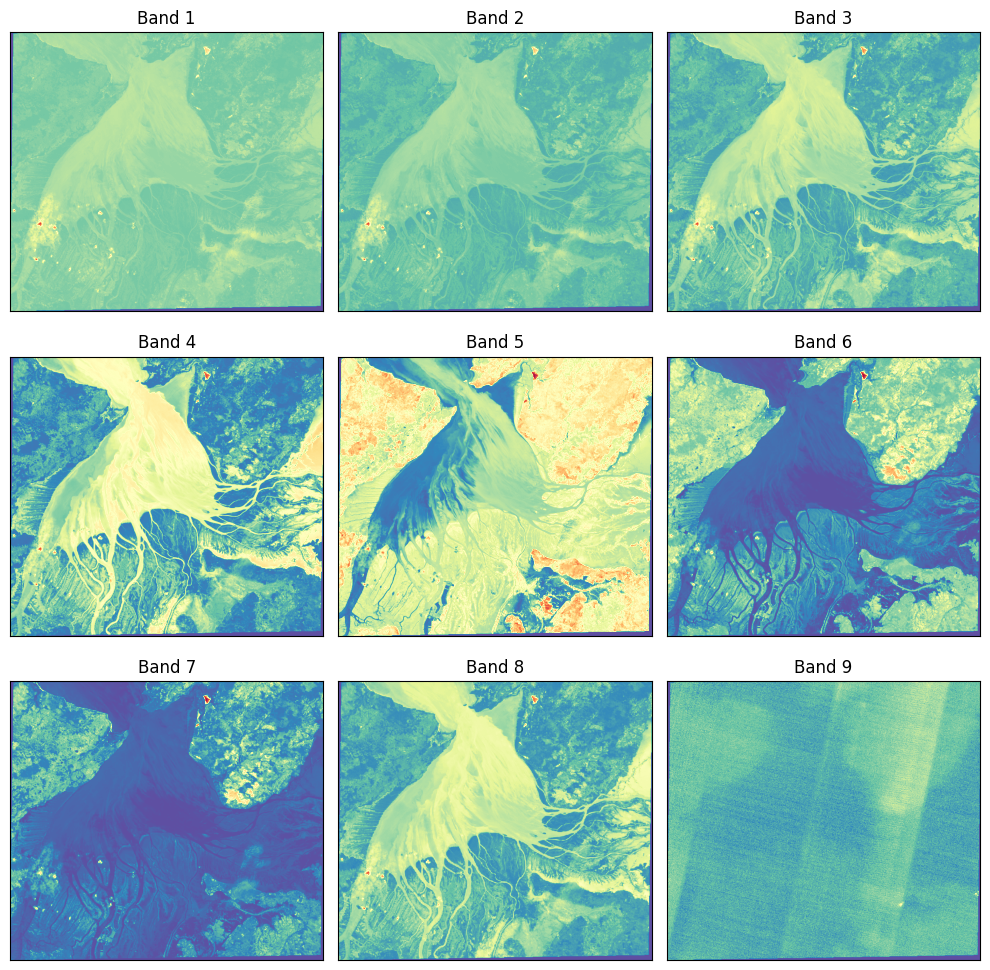

In [ ]:
# Visalize Bands

ep.plot_bands(arr_dur, cmap='Spectral_r', cols=3, figsize=(10, 10), cbar=False)

plt.show()

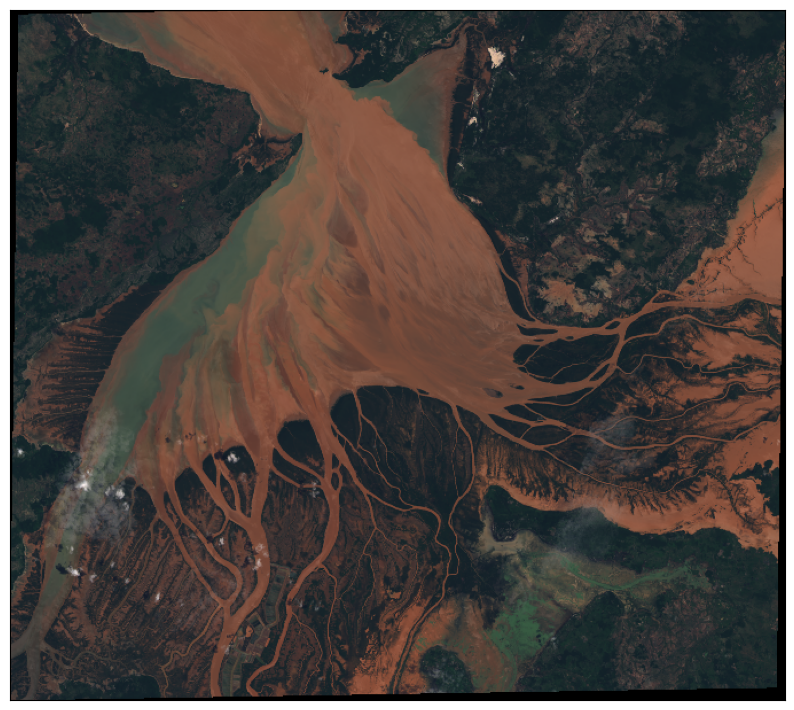

In [ ]:
# Visualize RGB Composite Image

ep.plot_rgb(arr_dur, rgb=(3, 2, 1), figsize=(10, 10))

plt.show()

In [ ]:
# NIR - 5
# SWIR - 6, 7

ndwi_dur = es.normalized_diff(arr_dur[5, :, :], arr_dur[7, :, :])

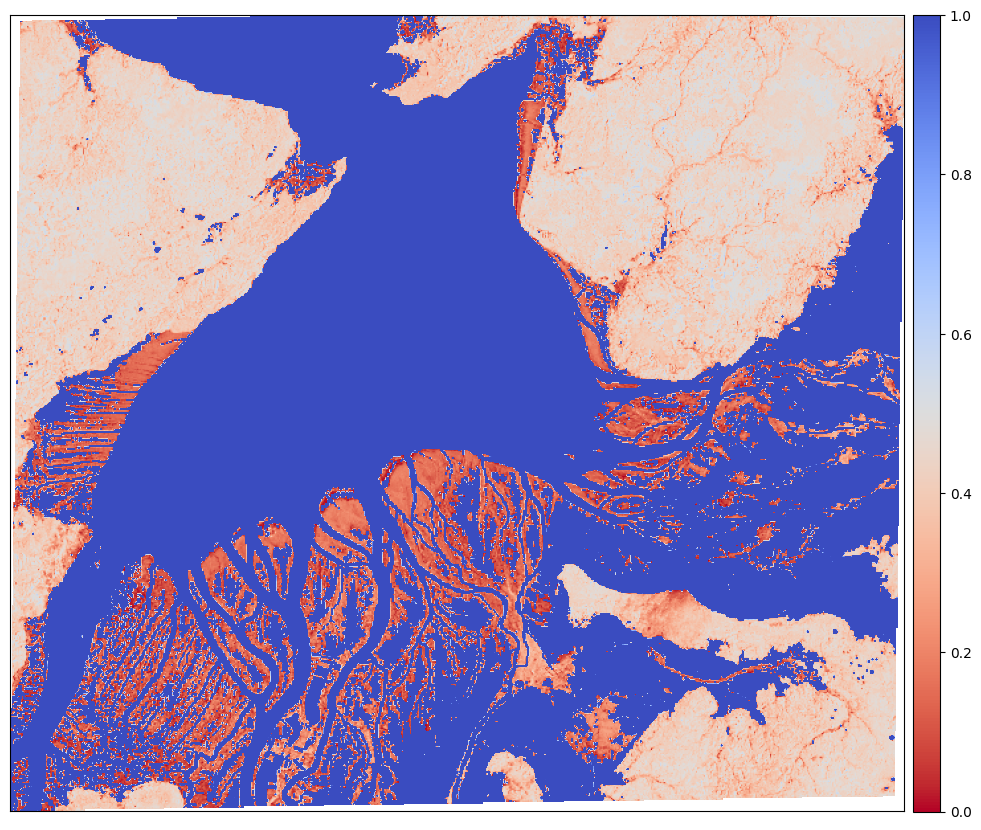

In [ ]:
ep.plot_bands(ndwi_dur, cmap='coolwarm_r', vmin=0, vmax=1)

plt.show()

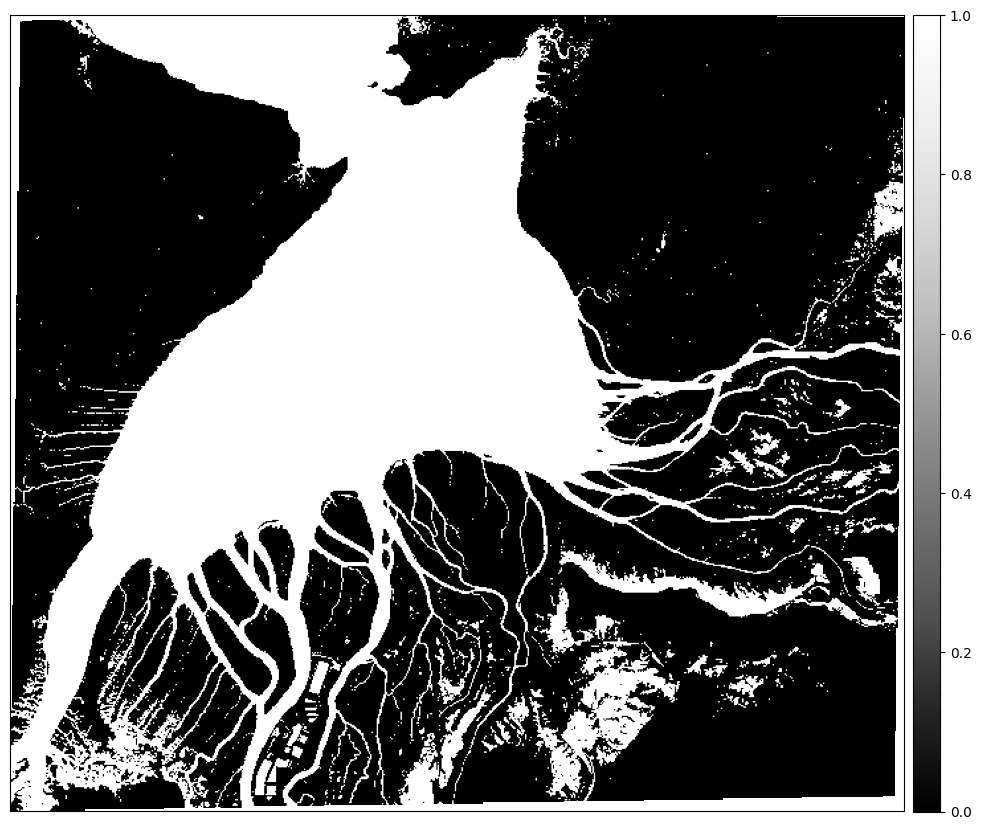

In [ ]:
# Mask the data into water and non water pixels based on a threshold value(0.6)

mask_bef = (ndwi_bef > 0.6).astype(int)

ep.plot_bands(mask_bef, cmap='Greys_r', figsize=(12, 12))
plt.show()

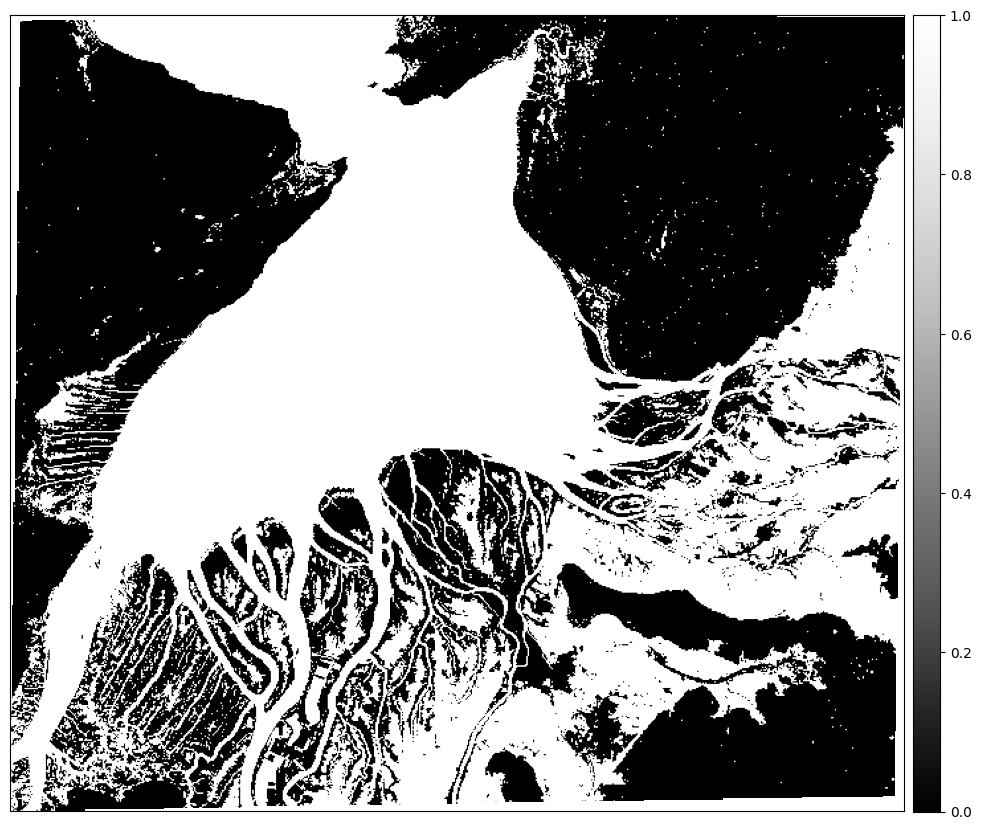

In [ ]:
# Mask the data into water and non water pixels based on a threshold value(0.6)

mask_dur = (ndwi_dur > 0.6).astype(int)

ep.plot_bands(mask_dur, cmap='Greys_r', figsize=(12, 12))
plt.show()


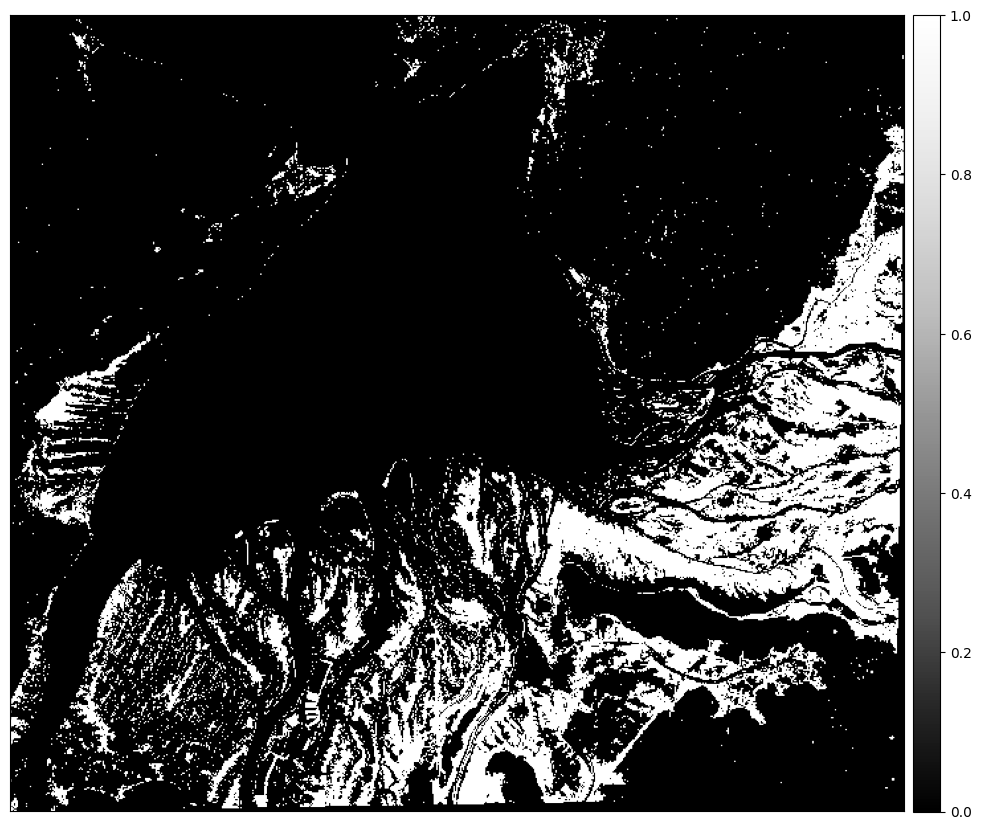

In [ ]:
mask_diff = (mask_dur - mask_bef)

mask_diff = np.where(mask_diff <0, 0, mask_diff)


ep.plot_bands(mask_diff, cmap='Greys_r', figsize=(12, 12))
plt.show()

In [ ]:
# Calculate statistics for before floods
water_pixels_before = np.sum(mask_bef == 1)
non_water_pixels_before = np.sum(mask_bef == 0)

# Calculate statistics for during floods
water_pixels_during = np.sum(mask_dur == 1)
non_water_pixels_during = np.sum(mask_dur == 0)

# Calculate percentage change in water pixels
percentage_change_water_pixels = ((water_pixels_during - water_pixels_before) / water_pixels_before) * 100

# Print statistics
print("Statistics for Before Floods:")
print("Number of water pixels:", water_pixels_before)
print("Number of non-water pixels:", non_water_pixels_before)

print("\nStatistics for During Floods:")
print("Number of water pixels:", water_pixels_during)
print("Number of non-water pixels:", non_water_pixels_during)

print("\nPercentage change in water pixels:", percentage_change_water_pixels)


Statistics for Before Floods:
Number of water pixels: 139817
Number of non-water pixels: 258708

Statistics for During Floods:
Number of water pixels: 197908
Number of non-water pixels: 200617

Percentage change in water pixels: 41.54788044372287
